# Face morphing algorithm research

In [1]:
import os

os.chdir("../..")

In [2]:
!pwd

/Users/wiktorlazarski/Desktop/my_project/face-morphing


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12, 10)

In [4]:
F_SAMPLE_ANN = os.path.join("data", "morph_samples", "1.txt")
F_SAMPLE_IMG = os.path.join("data", "morph_samples", "1.jpg")

S_SAMPLE_ANN = os.path.join("data", "morph_samples", "2.txt")
S_SAMPLE_IMG = os.path.join("data", "morph_samples", "2.jpg")

In [45]:
def load_sample(ann_file, img_file):
    keypoints = []

    with open(ann_file, "r") as ann_file:
        for i, line in enumerate(ann_file.readlines()):
            if i == 0:
                continue
        
            coords = [float(val) for val in line.split(",")]
            keypoints.append(tuple(coords))
    
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img, keypoints


def draw_traingulation(img, kps, line_thickness=2):
    img_rectangle = (0, 0, img.shape[1], img.shape[0]) 

    subdiv = cv2.Subdiv2D(img_rectangle)

    for kp in kps:
        subdiv.insert(kp)

    # Append artificial keypoints: an image edge, middle of an image edge
    img_h, img_w = img.shape[:2]
    
    subdiv.insert((0, 0))   # upper left
    subdiv.insert((0, img_h - 1))   # upper right
    subdiv.insert((img_w - 1, 0))   # lower left
    subdiv.insert((img_w - 1, img_h - 1))   # lower right
    
    subdiv.insert((img_w / 2, 0))   # up edge
    subdiv.insert((img_w / 2, img_h - 1))   # low edge
    subdiv.insert((0, img_h / 2))   # left edge
    subdiv.insert((img_w - 1, img_h / 2))   # right edge
    
    img_with_triagles = img.copy()
   
    for i, triangle in enumerate(subdiv.getTriangleList()):
        triangle = [round(val) for val in triangle]
        triangle_vertices = []
        for v_id in range(3):
            triangle_vertices.append((triangle[v_id * 2], triangle[v_id * 2 + 1]))

        triangle_vertices = np.array(triangle_vertices)
        cv2.drawContours(img_with_triagles, [triangle_vertices], 0, (255, 255, 0), line_thickness)
        
    plt.imshow(img_with_triagles)
    
    return subdiv.getTriangleList()

In [31]:
f_img, f_kps = load_sample(F_SAMPLE_ANN, F_SAMPLE_IMG)
s_img, s_kps = load_sample(S_SAMPLE_ANN, S_SAMPLE_IMG)

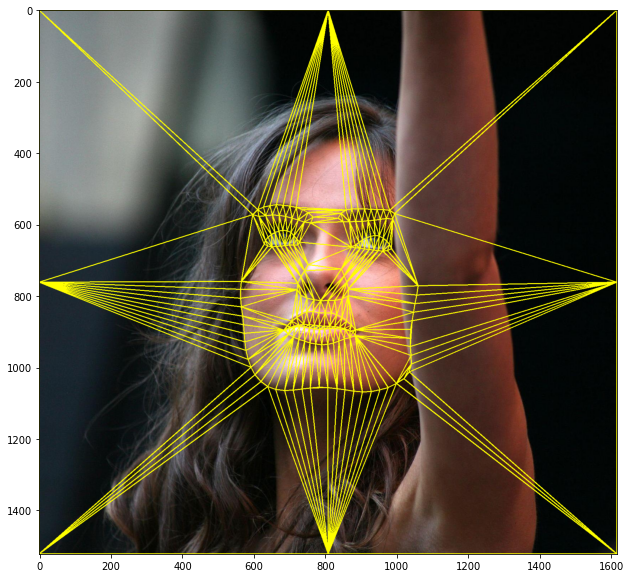

In [46]:
first_t = draw_traingulation(f_img, f_kps)

In [10]:
f_h, f_w = f_img.shape[:2]

In [14]:
resized_2 = cv2.resize(s_img, (f_w, f_h))

In [16]:
s_h, s_w = s_img.shape[:2]

In [17]:
sx, sy = f_w / s_w, f_h / s_h

In [83]:
new_s_kps = []

for kp in s_kps:
    x, y = kp
    new_x = x * sx
    new_y = y * sy
    new_s_kps.append((round(new_x, 2), round(new_y, 2)))

In [84]:
s_copy = resized_2.copy()

for keypoint in new_s_kps:
    x, y = round(keypoint[0]), round(keypoint[1])
    s_copy = cv2.circle(s_copy, (x, y), radius=5, color=(0,255,0), thickness=-1)

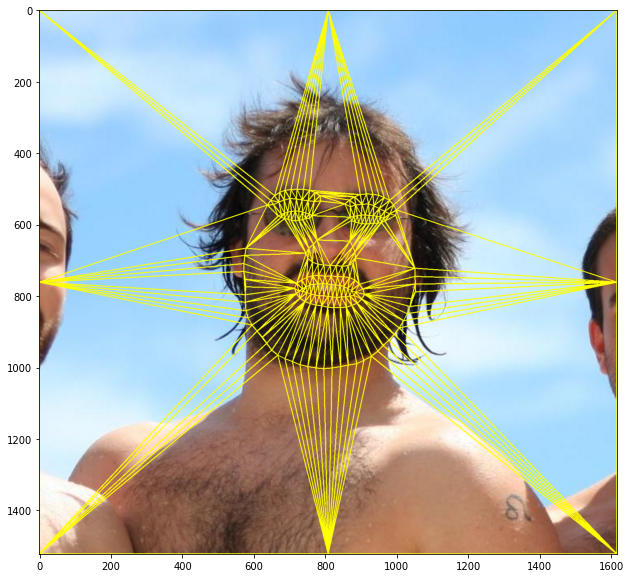

In [85]:
second_t = draw_traingulation(resized_2, new_s_kps, line_thickness=2)

In [86]:
first_tl = []
for t in first_t.tolist():
    temp = []
    for vi in range(3):
        temp.append((round(t[vi*2], 2), round(t[vi*2+1],2)))
    first_tl.append(temp)

In [87]:
zero_connected = []
for tr in first_tl:
    if f_kps[0] in tr:
        zero_connected.append(tr)
zero_connected

[[(565.86, 758.98), (0.0, 761.0), (598.25, 572.26)],
 [(0.0, 761.0), (565.86, 758.98), (564.27, 781.14)],
 [(564.27, 781.14), (565.86, 758.98), (721.9, 782.4)],
 [(721.9, 782.4), (565.86, 758.98), (724.35, 763.55)],
 [(724.35, 763.55), (565.86, 758.98), (651.89, 661.6)],
 [(651.89, 661.6), (565.86, 758.98), (639.97, 660.35)],
 [(639.97, 660.35), (565.86, 758.98), (629.97, 655.1)],
 [(629.97, 655.1), (565.86, 758.98), (598.25, 572.26)]]

In [88]:
second_tl = []
for t in second_t.tolist():
    temp = []
    for vi in range(3):
        temp.append((round(t[vi*2], 2), round(t[vi*2+1],2)))
    second_tl.append(temp)
    
zero_connected2 = []
for tr in second_tl:
    if new_s_kps[0] in tr:
        zero_connected2.append(tr)
zero_connected2

[[(747.06, 679.67), (579.31, 665.88), (687.41, 582.81)],
 [(579.31, 665.88), (747.06, 679.67), (575.71, 686.31)],
 [(579.31, 665.88), (0.0, 761.0), (639.03, 545.15)],
 [(0.0, 761.0), (579.31, 665.88), (575.71, 686.31)],
 [(687.41, 582.81), (579.31, 665.88), (678.36, 578.99)],
 [(678.36, 578.99), (579.31, 665.88), (669.2, 575.79)],
 [(669.2, 575.79), (579.31, 665.88), (639.03, 545.15)]]